In [ ]:
# Importing pandas
import pandas as pd

# Importing matplotlib and setting aesthetics for plotting later.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

# # Reading in current data from coinmarketcap.com
# current = pd.read_json("https://api.coinmarketcap.com/v1/ticker/")

# # Printing out the first few lines
# # ... YOUR CODE FOR TASK 1 ...
# current.head()




In [ ]:
# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv('/content/coinmarketcap_06122017.csv')

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id', 'market_cap_usd']]

# Counting the number of values
# ... YOUR CODE FOR TASK 2 ...
market_cap_raw.count()

id                100
market_cap_usd    100
dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Filtering out rows without a market capitalization
cap = market_cap_raw.query('market_cap_usd > 0')

# Counting the number of values again
# ... YOUR CODE FOR TASK 3 ...
cap.count()

id                100
market_cap_usd    100
dtype: int64

Text(0, 0.5, '% of total cap')

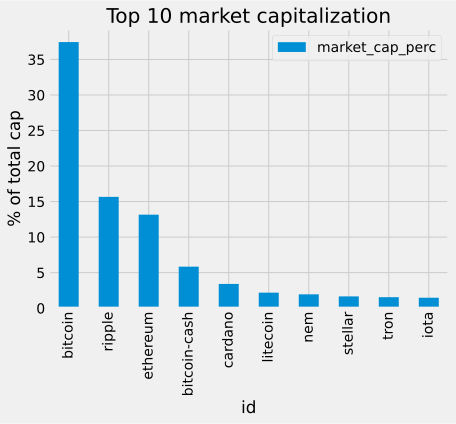

In [ ]:
#Declaring these now for later use in the plots
TOP_CAP_TITLE = 'Top 10 market capitalization'
TOP_CAP_YLABEL = '% of total cap'

# Selecting the first 10 rows and setting the index
cap10 = cap.head(10).set_index(cap.id[:10])

# Calculating market_cap_perc
cap10 = cap10.assign(market_cap_perc =
                    lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)

# Plotting the barplot with the title defined above
ax = cap10.plot.bar(x = 'id', y = 'market_cap_perc', title = TOP_CAP_TITLE)

# Annotating the y axis with the label defined above
# ... YOUR CODE FOR TASK 4 ...
ax.set_ylabel(TOP_CAP_YLABEL)

Text(0.5, 0, '')

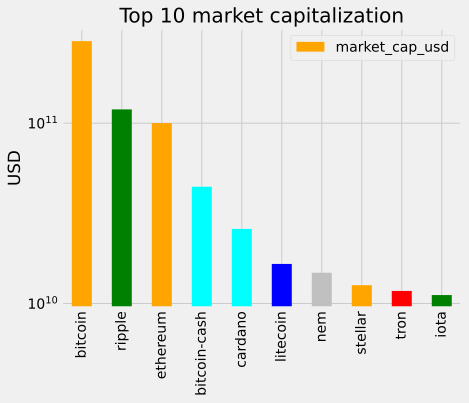

In [ ]:
# Colors for the bar plot
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotting market_cap_usd as before but adding the colors and scaling the y-axis
ax = cap10.plot.bar(x = 'id', y = 'market_cap_usd', logy = True, color = COLORS, title = TOP_CAP_TITLE)

# Annotating the y axis with 'USD'
# ... YOUR CODE FOR TASK 5 ...
ax.set_ylabel('USD')
# Final touch! Removing the xlabel as it is not very informative
# ... YOUR CODE FOR TASK 5 ...
ax.set_xlabel('')

In [ ]:
# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Sorting the DataFrame by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h', ascending = True)

# Checking the first few rows
# ... YOUR CODE FOR TASK 6 ...
volatility.head()

,percent_change_24h,percent_change_7d
id,,
ardor,-20.83,2.76
tenx,-15.81,6.55
tron,-12.63,434.36
digixdao,-12.19,15.65
status,-11.95,201.88


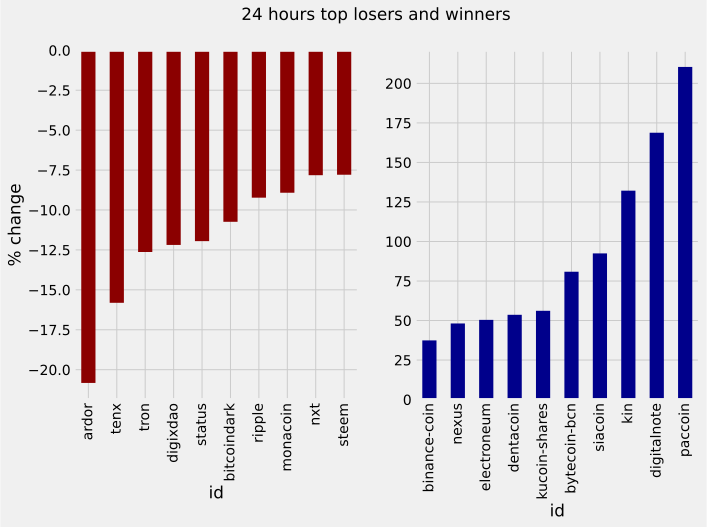

In [ ]:
#Defining a function with 2 parameters, the series to plot and the title
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

    # Plotting with pandas the barchart for the top 10 losers
    ax = (volatility_series[:10].plot.bar(color = 'darkred', ax = axes[0]))

    # Setting the figure's main title to the text passed as parameter
    # ... YOUR CODE FOR TASK 7 ...
    fig.suptitle(title)
    # Setting the ylabel to '% change'
    # ... YOUR CODE FOR TASK 7 ...
    ax.set_ylabel('% change')
    # Same as above, but for the top 10 winners
    ax = (volatility_series[-10:].plot.bar(color = 'darkblue', ax = axes[1]))

    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "24 hours top losers and winners"

# Calling the function above with the 24 hours period series and title DTITLE
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)

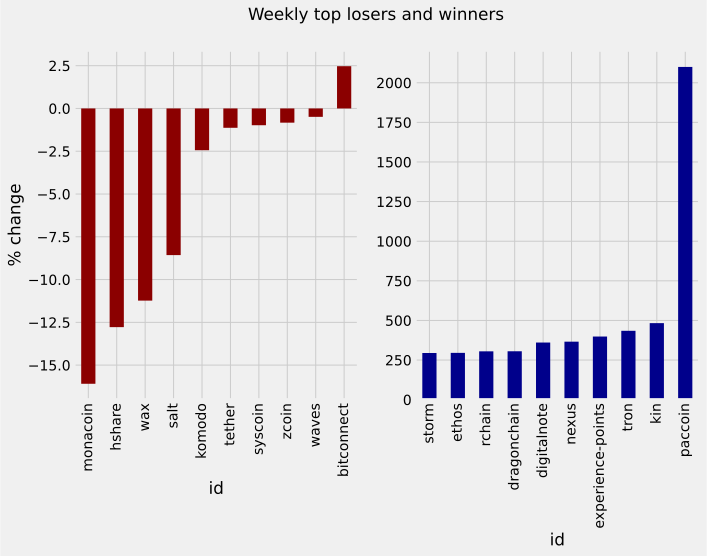

In [ ]:
# Sorting in ascending order
volatility7d = volatility.sort_values('percent_change_7d', ascending = True)

WTITLE = "Weekly top losers and winners"

# Calling the top10_subplot function
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE)

In [ ]:
# Selecting everything bigger than 10 billion
largecaps = cap.query('market_cap_usd > 10000000000')

# Printing out largecaps
# ... YOUR CODE FOR TASK 9 ...
largecaps

,id,market_cap_usd
0,bitcoin,284909052105
1,ripple,119207709132
2,ethereum,100115499075
3,bitcoin-cash,44424061657
4,cardano,25916647856
5,litecoin,16574020942
6,nem,14813369998
7,stellar,12634630726
8,tron,11741640953
9,iota,11143859582


<BarContainer object of 3 artists>

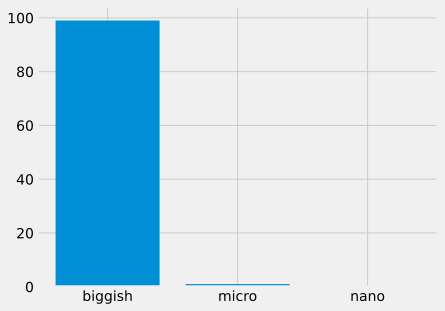

In [ ]:
# Making a nice function for counting different marketcaps from the
# "cap" DataFrame. Returns an int.
# INSTRUCTORS NOTE: Since you made it to the end, consider it a gift :D
def capcount(query_string):
    return cap.query(query_string).count().id

# Labels for the plot
LABELS = ["biggish", "micro", "nano"]

# Using capcount count the biggish cryptos
biggish = capcount('market_cap_usd > 300000000')

# Same as above for micro ...
micro = capcount('market_cap_usd > 50000000 & market_cap_usd < 300000000')

# ... and for nano
nano =  capcount('market_cap_usd < 50000000')

# Making a list with the 3 counts
values = (biggish, micro, nano)

# Plotting them with matplotlib
# ... YOUR CODE FOR TASK 10 ...
plt.bar(range(len(values)), values, tick_label = LABELS)

Mean Squared Error: 473.28555533964374
R-squared: -1.9920390057449566


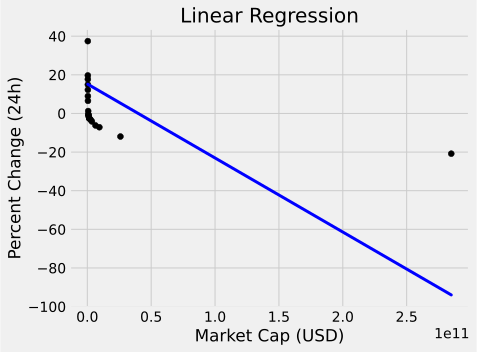

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'market_cap_usd' is the feature and 'percent_change_24h' is the target variable
X = cap[['market_cap_usd']]
y = volatility['percent_change_24h']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Market Cap (USD)')
plt.ylabel('Percent Change (24h)')
plt.title('Linear Regression')
plt.show()


In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 25.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
# Importing pandas
import pandas as pd

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv('/content/coinmarketcap_06122017.csv')

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id', 'market_cap_usd']]
cap = market_cap_raw.query('market_cap_usd > 0')  # Filter the data

# Selecting the id, percent_change_24h and percent_change_7d columns
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Setting the index to 'id' and dropping all NaN rows
volatility = volatility.set_index('id').dropna()

# Assuming 'market_cap_usd' is the feature and 'percent_change_24h' is the target variable
X = cap[['market_cap_usd']]
y = (volatility['percent_change_24h'] > 0).astype(int)  # Convert to binary classes

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
model = GaussianNB()

# Train the Naive Bayes classifier
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.65


Mean Squared Error: 541.9063084000001
R-squared: -0.8740522759257847


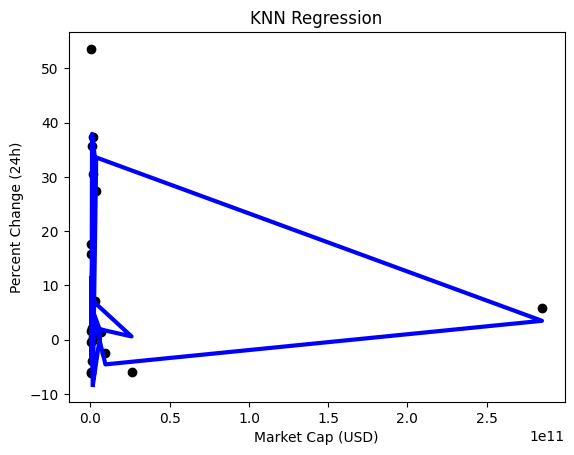

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'market_cap_usd' is the feature and 'percent_change_24h' is the target variable
X = cap[['market_cap_usd']]
y = volatility['percent_change_24h']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor
model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as per your choice

# Train the KNN regressor
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Plot the regression line
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Market Cap (USD)')
plt.ylabel('Percent Change (24h)')
plt.title('KNN Regression')
plt.show()

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'market_cap_usd' is the feature and 'percent_change_24h' is the target variable
X = cap[['market_cap_usd']]
y = volatility['percent_change_24h']

# Convert target variable into classes for classification
# For example, if 'percent_change_24h' > 0, class = 1 (increase), else class = 0 (decrease)
y_class = (y > 0).astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
model = GaussianNB()

# Train the Naive Bayes classifier
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.67      0.92      0.77        13

    accuracy                           0.65        20
   macro avg       0.58      0.53      0.50        20
weighted avg       0.61      0.65      0.58        20



In [ ]:
# Importing pandas
import pandas as pd

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Reading datasets/coinmarketcap_06122017.csv into pandas
dec6 = pd.read_csv('/content/coinmarketcap_06012018.csv')

# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_raw = dec6[['id', 'market_cap_usd']]
cap = market_cap_raw.query('market_cap_usd > 0')  # Filter the data

# Selecting the id, percent_change_24h column
volatility = dec6[['id', 'percent_change_24h']]

# Create target labels: 1 if percent change is positive, 0 if negative
volatility['target'] = (volatility['percent_change_24h'] > 0).astype(int)

# Assuming 'market_cap_usd' is the feature and 'target' is the target variable
X = cap[['market_cap_usd']]
y = volatility['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
model = GaussianNB()

# Train the Naive Bayes classifier
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.65


<ipython-input-7-2c2da8dc3b88>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volatility['target'] = (volatility['percent_change_24h'] > 0).astype(int)


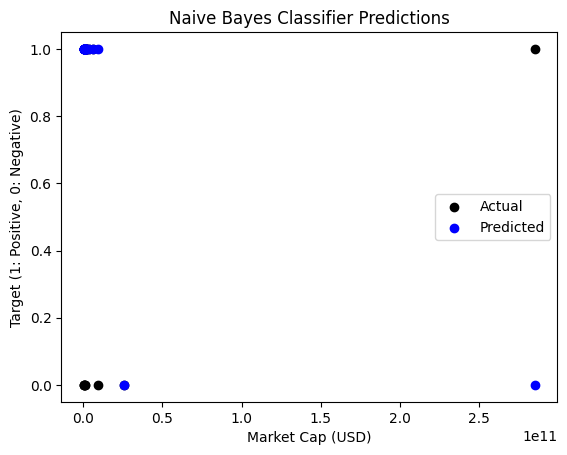

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual target values
plt.scatter(X_test, y_test, color='black', label='Actual')

# Plot the predicted values
plt.scatter(X_test, y_pred, color='blue', label='Predicted')

plt.xlabel('Market Cap (USD)')
plt.ylabel('Target (1: Positive, 0: Negative)')
plt.title('Naive Bayes Classifier Predictions')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
files.download('/content/drive/MyDrive/file.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import pandas as pd
result.to_csv('/content/drive/MyDrive/file.txt')
files.download('/content/drive/MyDrive/file.txt')

NameError: name 'result' is not defined